In [11]:

import pandas as pd
import matplotlib.pyplot as plt

player = 'Jack Eichel'

faceoff_data = pd.read_csv('data/faceoff_data.csv')

#faceoff_data.tail(20)

Text(12, 40, 'Ignorable')

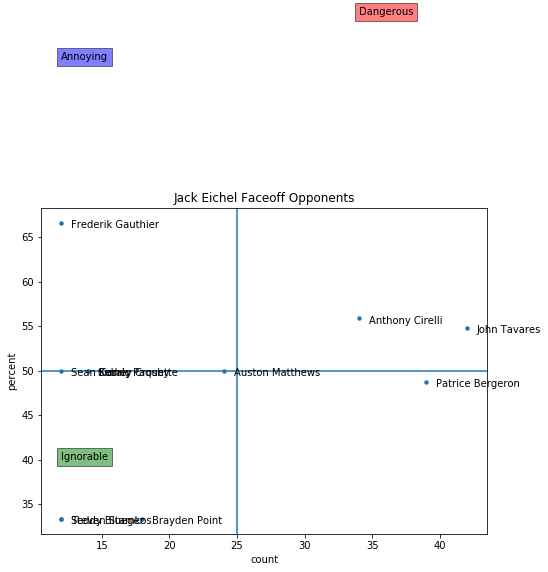

In [12]:

temp_df = faceoff_data.loc[faceoff_data['player'] == player] \
    .groupby('opponent', sort=False, as_index=False) \
    .agg({ 'game_id': 'count', 'win': 'sum'}) \
    .rename(columns={'game_id': 'count'}) \
    .set_index('opponent')

temp_df['percent'] = (temp_df['win'] / temp_df['count']) * 100

#temp_df.loc[temp_df['count'] > 10].round({'percent': 2}).sort_values('count', ascending=False).head(30)

fig, ax = plt.subplots()

temp_df.loc[temp_df['count'] > 10].round({'percent': 2}).head(30).plot( \
    'count', \
    'percent', \
    kind='scatter', \
    ax=ax, \
    linewidth=0, \
    figsize=(8,6)
)

plt.title('{0} Faceoff Opponents'.format(player))

for k, v in temp_df.loc[temp_df['count'] > 10].round({'percent': 2}).head(30).iterrows():
    xy = [ v['count'], v['percent']]
    ax.annotate(k, xy, xytext=(10, -5), textcoords='offset points')

ax.axhline(y=50)
ax.axvline(x=25)
ax.text(34, 90, 'Dangerous', bbox=dict(facecolor='red', alpha=0.5))
ax.text(12, 85, 'Annoying', bbox=dict(facecolor='blue', alpha=0.5))
ax.text(12, 40, 'Ignorable', bbox=dict(facecolor='green', alpha=0.5))
